# 🛠️ 0. 초기 설정

## 라이브러리 Import

In [ ]:
# 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 한글 설정

In [ ]:
# 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

fm.fontManager.addfont(path)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

## 파일 마운트

In [ ]:
# 파일 마운트
# 드라이브 마운트 코드
from google.colab import drive

# Restart the runtime before running this cell.
drive.mount('/content/drive')

Mounted at /content/drive


## 목표
**1. 자전거 대여 패턴을 분석하여 자전거 배치 및 운영 전략을 최적화하고, 대여 수요를 정확히 예측하는 것**

**2. RMSLE (Root Mean Squared Logarithmic Error)를 최대한 낮추는 것**

## 데이터 프레임 생성

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/코드잇/스프린트 미션 제출용/data/test.csv")
train_df = pd.read_csv("/content/drive/MyDrive/코드잇/스프린트 미션 제출용/data/train.csv")

# 기존 데이터 개수
original_data_count = len(train_df)
original_data_count

test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


casual	registered  count가 이상

-> 평균이랑 중앙값이 너무 다름

-> 그래프 그려보고 판단해야됨

75%(q3) -> 284.000000 (이상함)

windspeed

-> 최대값 57 / q3 = 17



In [ ]:
train_df.describe()

# count
# max, 75% 차이를 보고 오른쪽으로 치우쳐있다는걸 판단

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,2665.0,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,1.0,0.026642,0.678049,1.411632,12.506462,15.200004,56.709193,14.618354,15.594371,101.424765,117.019137
std,0.0,0.161064,0.467312,0.621028,5.196104,6.102418,19.628299,9.165139,31.322157,108.271187,125.494362
min,1.0,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0,0.000000,0.000000,1.000000,9.020000,10.605000,41.000000,7.001500,1.000000,22.000000,25.000000
50%,1.0,0.000000,1.000000,1.000000,12.300000,14.395000,54.000000,12.998000,5.000000,70.000000,79.000000
75%,1.0,0.000000,1.000000,2.000000,15.580000,19.695000,70.000000,19.999500,15.000000,142.000000,165.000000
max,1.0,1.000000,1.000000,3.000000,29.520000,32.575000,100.000000,51.998700,367.000000,681.000000,801.000000


from matplotlib import pyplot as plt
_df_17['season'].plot(kind='hist', bins=20, title='season')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['holiday'].plot(kind='hist', bins=20, title='holiday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['workingday'].plot(kind='hist', bins=20, title='workingday')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['weather'].plot(kind='hist', bins=20, title='weather')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='season', y='holiday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='holiday', y='workingday', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='workingday', y='weather', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24.plot(kind='scatter', x='weather', y='temp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['season'].plot(kind='line', figsize=(8, 4), title='season')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['holiday'].plot(kind='line', figsize=(8, 4), title='holiday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['workingday'].plot(kind='line', figsize=(8, 4), title='workingday')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['weather'].plot(kind='line', figsize=(8, 4), title='weather')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
# 데이터 삭제 전 후 비교 바 그래프
def compare_data_count_bar_graph(right_label: str, modified_count):
    # 라벨과 값
    labels = ['기존 전체 데이터 개수', right_label]
    values = [original_data_count, original_data_count - modified_count]

    # 그래프 그리기
    plt.figure(figsize=(4, 7))

    plt.bar(
        labels,
        values,
        color=['darkgray', 'gray']
    )
    plt.title(f'{right_label} 이상치 제거 전/후 데이터 개수 비교')
    plt.ylabel('데이터 개수')

    # 수치 표시
    for i, v in enumerate(values):
        plt.text(i, v + 10, str(v), ha='center', fontweight='bold')

    plt.show()

# 📊 1. 데이터 분석

## 데이터 연관성 - 히트맵

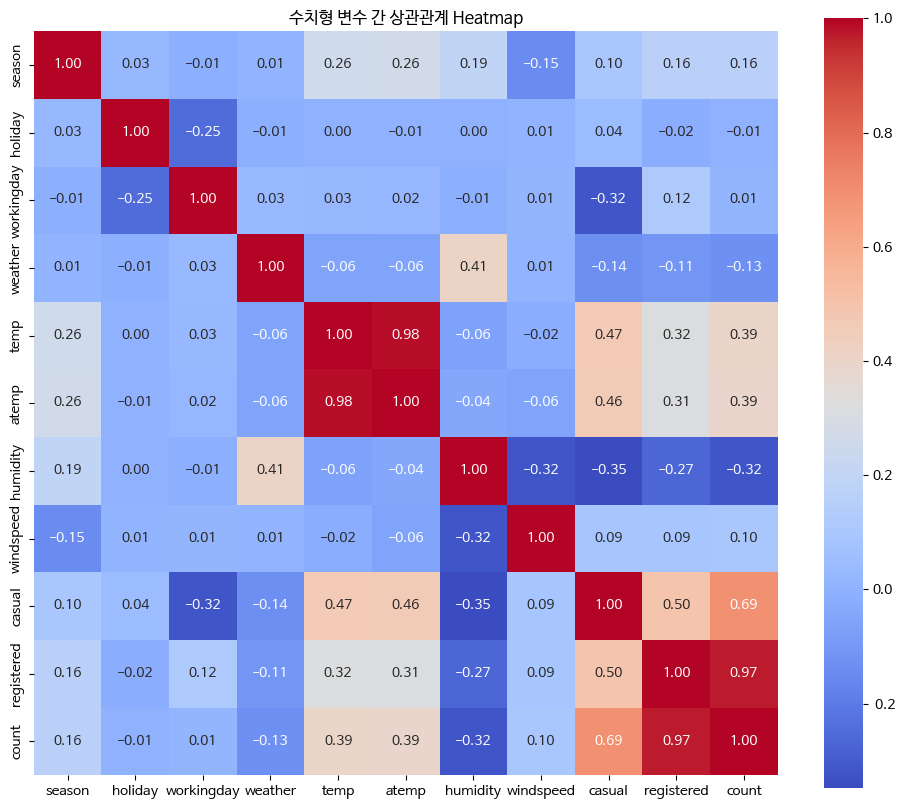

In [ ]:
# 수치형 변수만 선택
numerical_data = train_df.select_dtypes(include=['int64', 'float64'])

# 상관관계 행렬
corr_matrix = numerical_data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("수치형 변수 간 상관관계 Heatmap")
plt.show()

## 연관값 비교
- 체감온도(atemp)와 비회원 연관 파악

🟢 **결론**
- 체감 온도가 높아질수록 비회원들의 자전거 대여율이 높아지는 경향이 있음

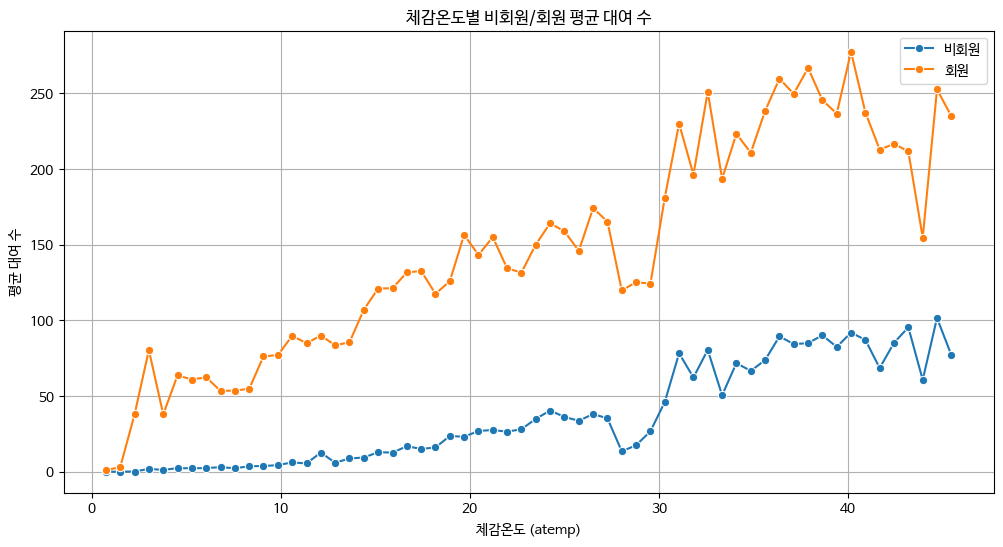

In [ ]:
temp_group = train_df.groupby("atemp")[["casual", "registered"]].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=temp_group, x="atemp", y="casual", label="비회원", marker="o")
sns.lineplot(data=temp_group, x="atemp", y="registered", label="회원", marker="o")
plt.title("체감온도별 비회원/회원 평균 대여 수")
plt.xlabel("체감온도 (atemp)")
plt.ylabel("평균 대여 수")
plt.legend()
plt.grid(True)
plt.show()


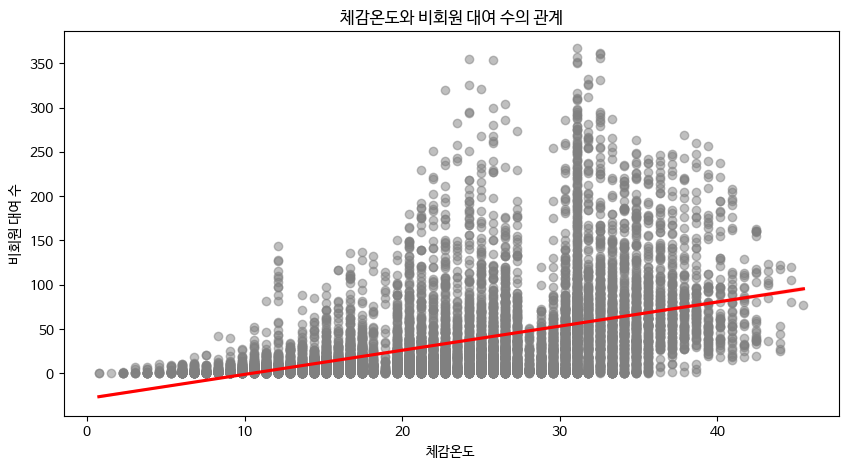

In [ ]:
plt.figure(figsize=(10, 5))

sns.regplot(
    data=train_df,
    x='atemp',
    y='casual',
    scatter_kws={'color': 'gray', 'alpha': 0.5},
    line_kws={'color': 'red'}  # 회귀선 색상
)
plt.title('체감온도와 비회원 대여 수의 관계')
plt.xlabel('체감온도')
plt.ylabel('비회원 대여 수')
plt.show()

In [ ]:
train_df.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


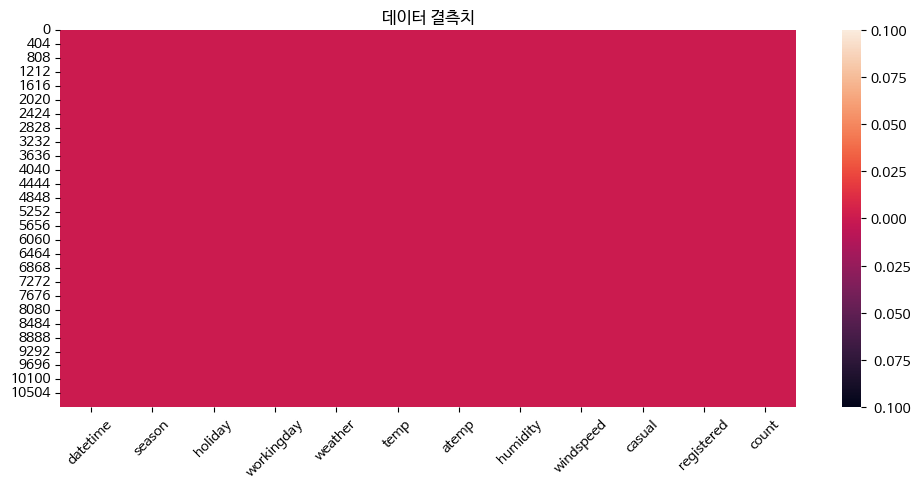

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull())
plt.title("데이터 결측치")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# plt.figure(figsize=(20, 6))

# plt.plot(train_df['datetime'], train_df['count'])
# plt.xlabel('Datetime')
# plt.ylabel('Count')
# plt.title('Datetime vs Count')
# plt.show()

## 이상치 분석

### 수치형 컬럼
- datetime 제외 전부 다

In [ ]:
# 수치형 컬럼만 선택
numerical_cols = numerical_data.columns

print(numerical_cols.tolist())
print(len(numerical_cols), ' / ', len(train_df.columns))

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
11  /  12


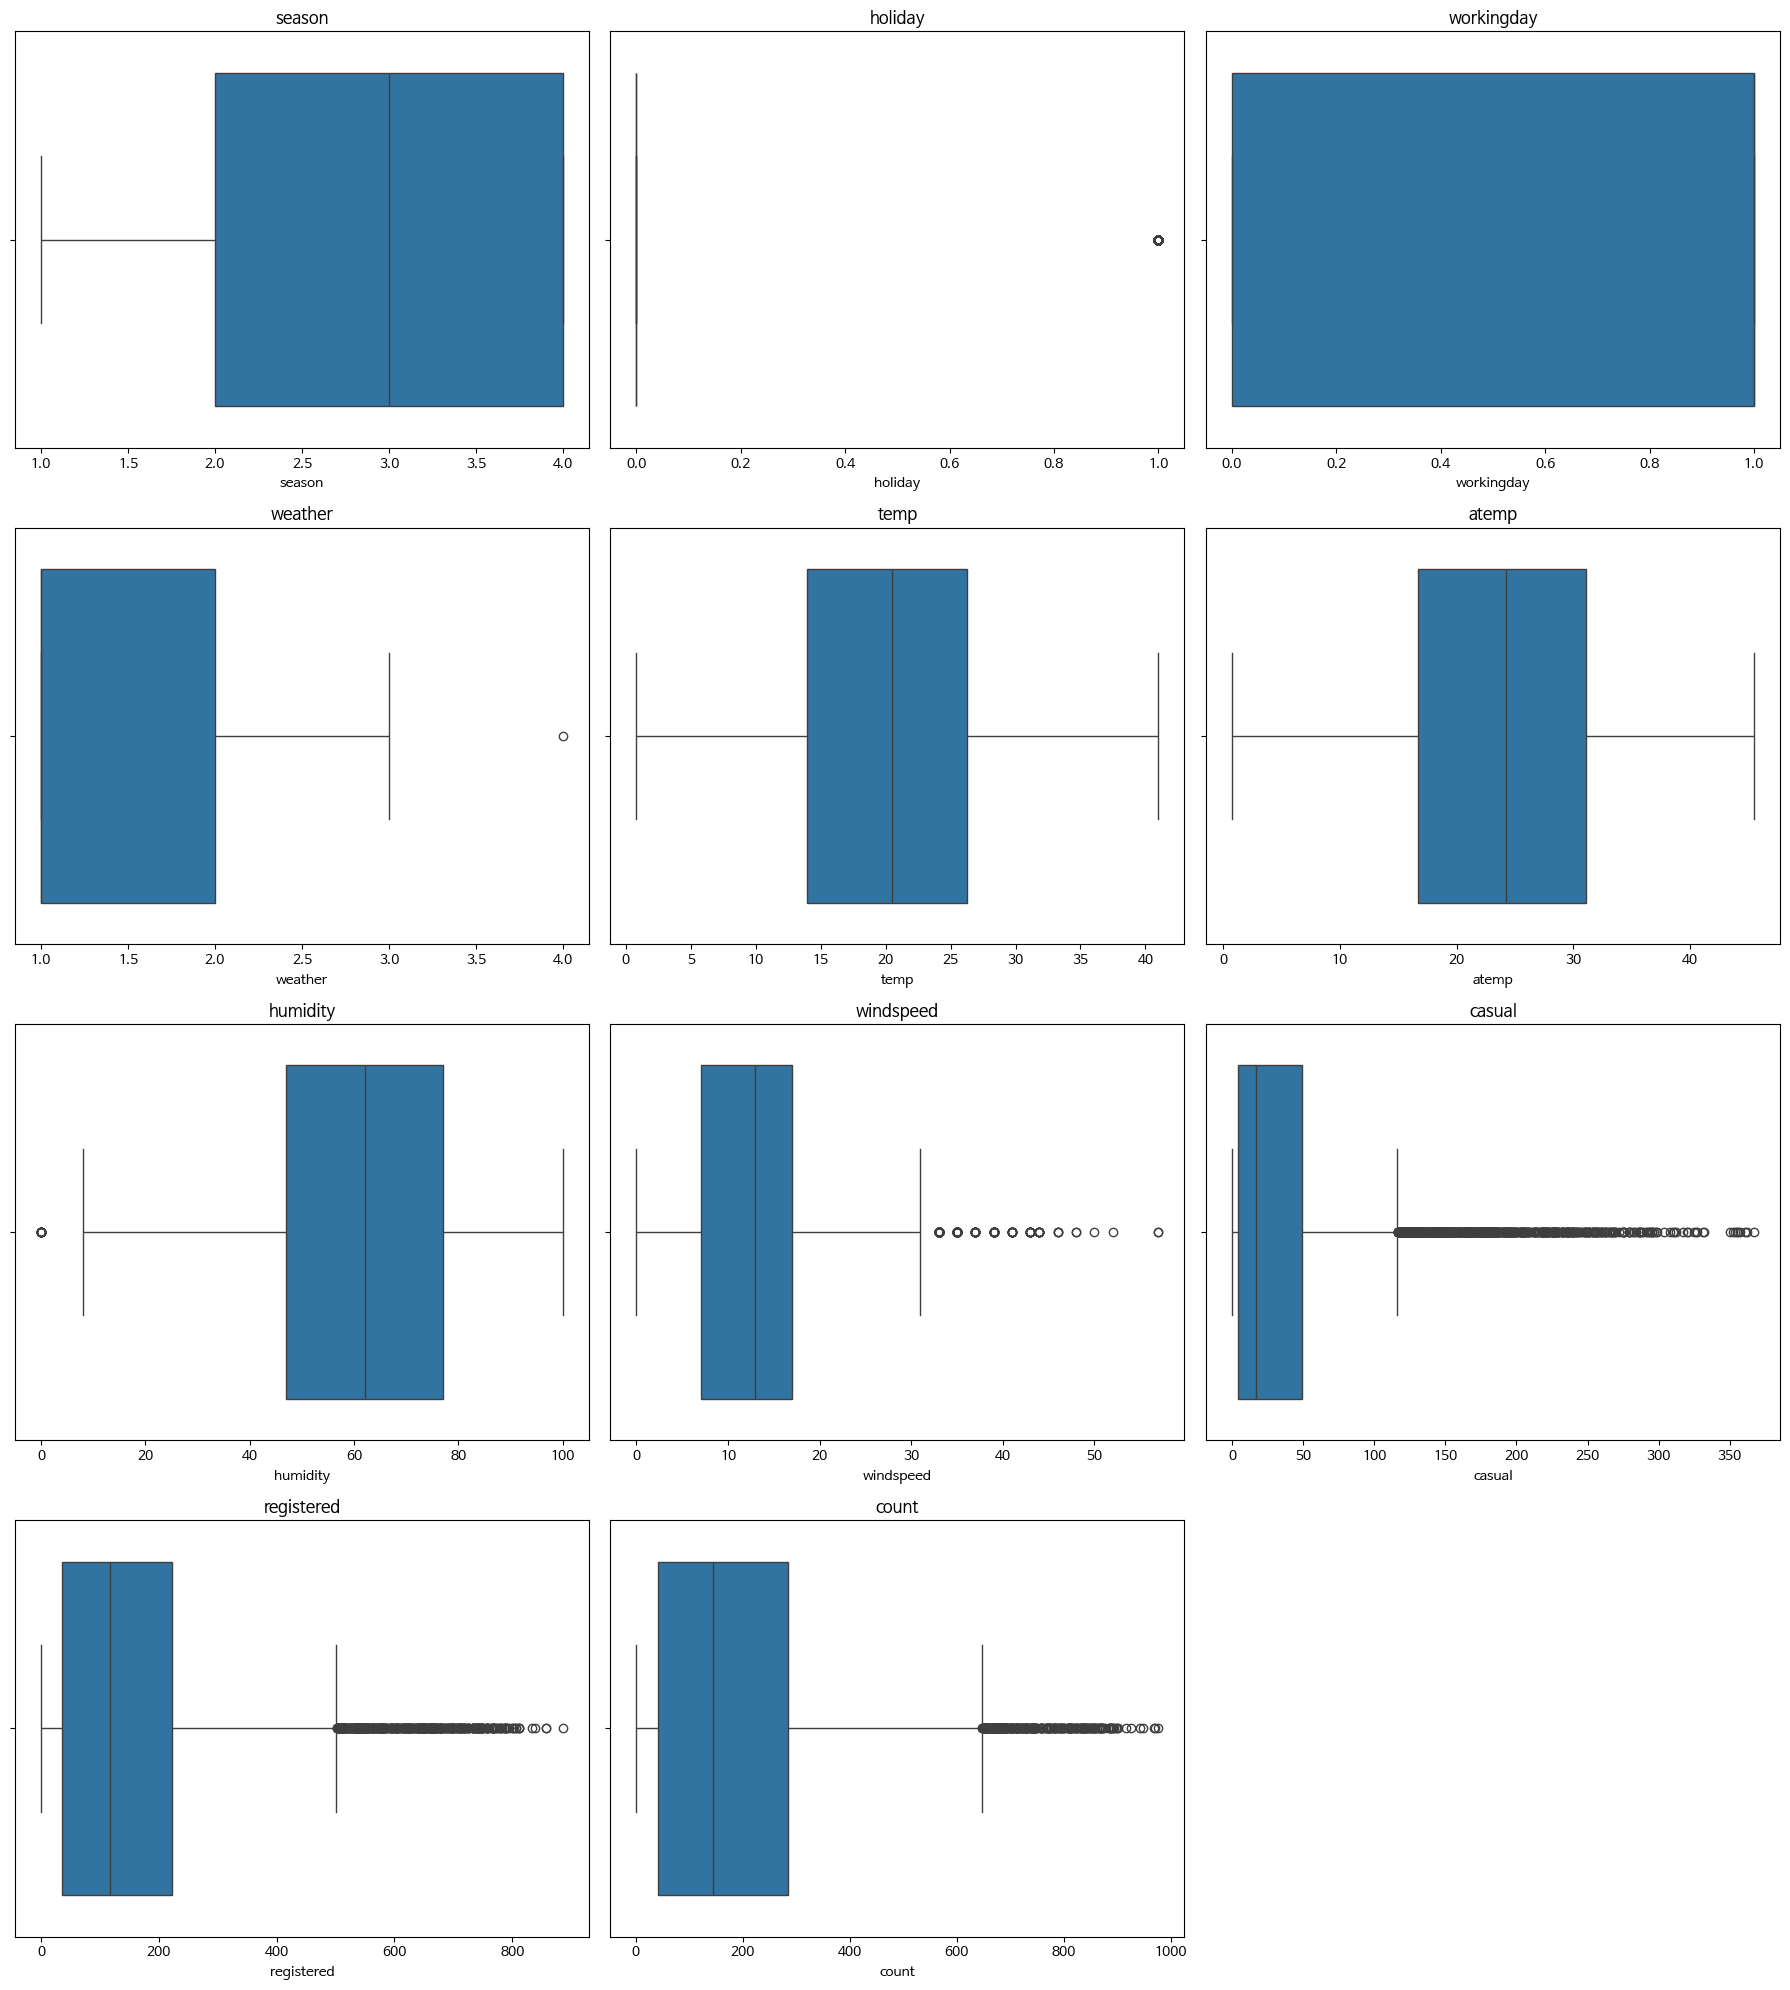

In [ ]:
import math

num_cols = len(numerical_cols)
cols_per_row = 3
rows = math.ceil(num_cols / cols_per_row)

plt.figure(figsize=(18, 5 * rows))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(
        rows,
        cols_per_row,
        i
    )
    sns.boxplot(data=train_df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

### 이상치 데이터 1. weather
- 계절: 봄
- 날씨: 폭우/폭설
- 기온: 8 ~ 11도
- 습도: 86% (엄청 습함)
- 전체 자전거 대여 대수: 164

-> 봄에 폭우: 이상기후 현상으로 가정

-> 폭우가 내렸는데 164대의 자전거 대여 발생?: 전체 데이터 대비 비중이 적으니 삭제

In [ ]:
train_df[train_df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


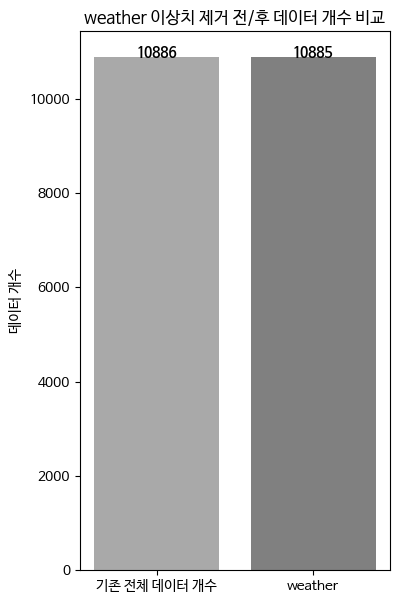

In [ ]:
weather_odd_data = train_df[(train_df['weather'] == 4) & (train_df['season'] == 1)]
weather_odd_data_count = len(weather_odd_data)

compare_data_count_bar_graph("weather", weather_odd_data_count)

# original_data_count 갱신
original_data_count -= weather_odd_data_count

In [ ]:
ratio = train_df[train_df['weather'] == 4]['count'].sum() / train_df['count'].sum() * 100

print(f"해당 이상치의 자전거 대여 수 비율: {ratio:.2f}%")

해당 이상치의 자전거 대여 수 비율: 0.01%


In [ ]:
# 이상치 삭제
train_df = train_df[~(train_df['weather'] == 4) & (train_df['season'] == 1)]

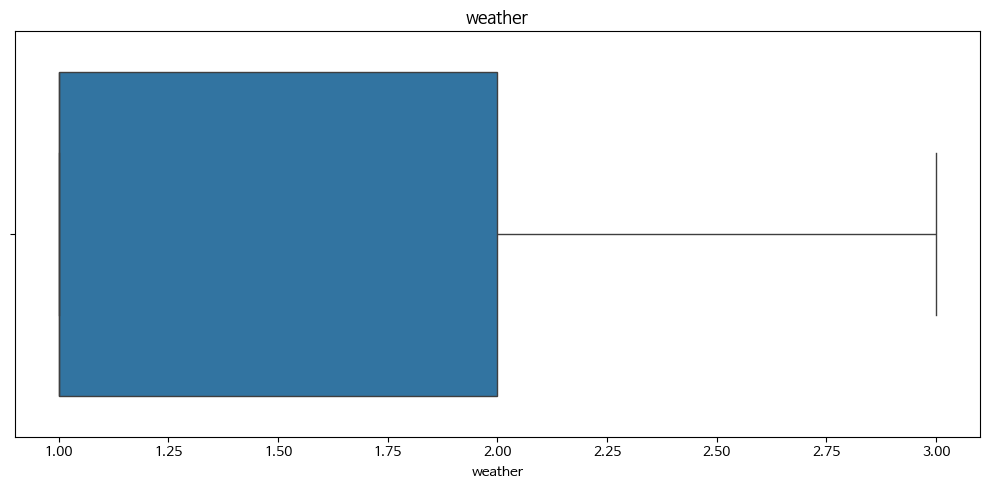

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df, x='weather')
plt.title('weather')

plt.tight_layout()
plt.show()

### 이상치 데이터 2. 습도가 0

In [ ]:
train_df[train_df['humidity'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1091,2011-03-10 00:00:00,1,0,1,3,13.94,15.910,0,16.9979,3,0,3
1092,2011-03-10 01:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,2,2
1093,2011-03-10 02:00:00,1,0,1,3,13.94,15.910,0,16.9979,0,1,1
1094,2011-03-10 05:00:00,1,0,1,3,14.76,17.425,0,12.9980,1,2,3
1095,2011-03-10 06:00:00,1,0,1,3,14.76,16.665,0,22.0028,0,12,12
1096,2011-03-10 07:00:00,1,0,1,3,15.58,19.695,0,15.0013,1,36,37
1097,2011-03-10 08:00:00,1,0,1,3,15.58,19.695,0,19.0012,1,43,44
1098,2011-03-10 09:00:00,1,0,1,3,16.40,20.455,0,15.0013,1,23,24
1099,2011-03-10 10:00:00,1,0,1,3,16.40,20.455,0,11.0014,0,17,17
1100,2011-03-10 11:00:00,1,0,1,3,16.40,20.455,0,16.9979,6,5,11


#### 습도가 0 이면서, 날씨가 3 or 4인 경우
- 말이 안되는 데이터라 판단하여 삭제

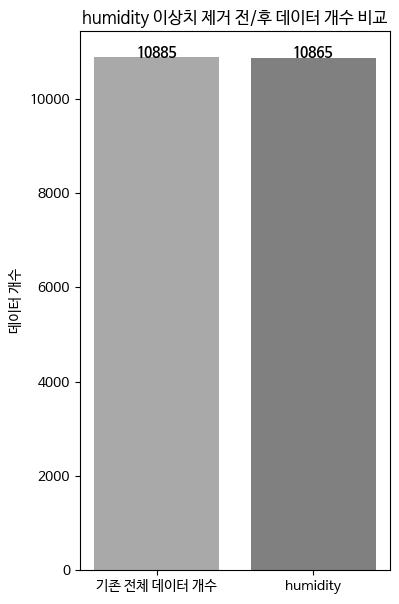

In [ ]:
humidity_odd_data = train_df[(train_df['humidity'] == 0) & ((train_df['weather'] == 3) | (train_df['weather'] == 4))]
humidity_odd_data_count = len(humidity_odd_data)

compare_data_count_bar_graph('humidity', humidity_odd_data_count)

# original_data_count 갱신
original_data_count -= humidity_odd_data_count

In [ ]:
train_df = train_df[~(
    (train_df['humidity'] == 0) &
    ((train_df['weather'] == 3) | (train_df['weather'] == 4))
)]
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148


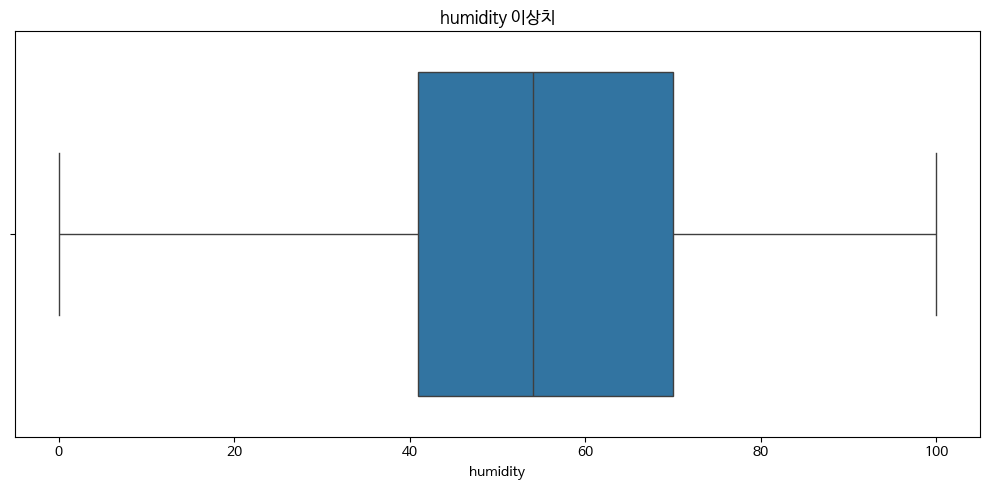

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=train_df,
    x=train_df['humidity']
)
plt.title('humidity 이상치')

plt.tight_layout()
plt.show()

In [ ]:
train_df[train_df['humidity'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1106,2011-03-10 17:00:00,1,0,1,2,18.04,21.970,0,26.0027,2,109,111
1111,2011-03-10 22:00:00,1,0,1,2,13.94,16.665,0,8.9981,4,30,34


### 이상치 데이터 3. 회원, 비회원, 총 대여 수

In [ ]:
train_df[['casual', 'registered', 'count']]

# count 잘못된 계산 데이터 있는지 확인
train_df[(train_df['casual'] + train_df['registered'] != train_df['count'])]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


#### 비회원의 대여 수?

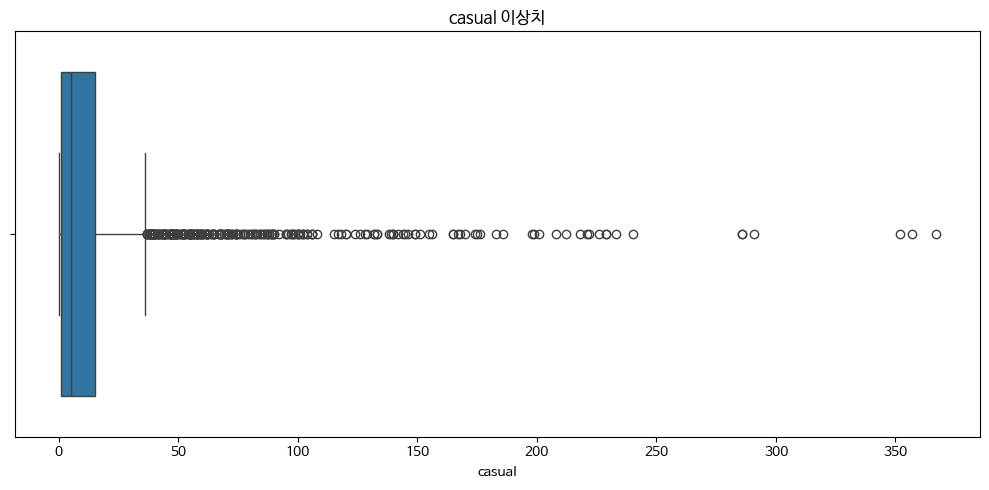

In [ ]:
plt.figure(figsize=(10, 5))

sns.boxplot(
    data=train_df,
    x=train_df['casual']
)
plt.title('casual 이상치')

plt.tight_layout()
plt.show()

In [ ]:
q1 = np.percentile(train_df['casual'], 25)
q3 = np.percentile(train_df['casual'], 75)
iqr = q3 - q1

casual_lower_bound = q1 - 1.5 * iqr
casual_upper_bound = q3 + 1.5 * iqr
print(f"casual_lower_bound: {casual_lower_bound}")
print(f"casual_upper_bound: {casual_upper_bound}")

casual_lower_bound: -20.0
casual_upper_bound: 36.0


In [ ]:
# 이상치 데이터 확인
outliers = train_df[(train_df['casual'] < casual_lower_bound) | (train_df['casual'] > casual_upper_bound)]
outliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94
15,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110
16,2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93
560,2011-02-06 12:00:00,1,0,0,1,13.94,16.665,46,0.0000,48,126,174
561,2011-02-06 13:00:00,1,0,0,1,13.94,18.180,46,0.0000,47,135,182
...,...,...,...,...,...,...,...,...,...,...,...,...
6776,2012-03-19 15:00:00,1,0,1,1,26.24,31.060,57,15.0013,97,189,286
6777,2012-03-19 16:00:00,1,0,1,1,27.06,31.060,50,15.0013,65,320,385
6778,2012-03-19 17:00:00,1,0,1,1,26.24,31.060,53,15.0013,106,615,721
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801


In [ ]:
# 비회원 자전거 대여 값이 상한을 넘으면 상한값으로, 하한보다 작으면 하한값으로 변환
# train_df["casual_winsor"] = train_df["casual"].clip(casual_lower_bound, casual_upper_bound)
# train_df

### 이상치 데이터 4. wind speed

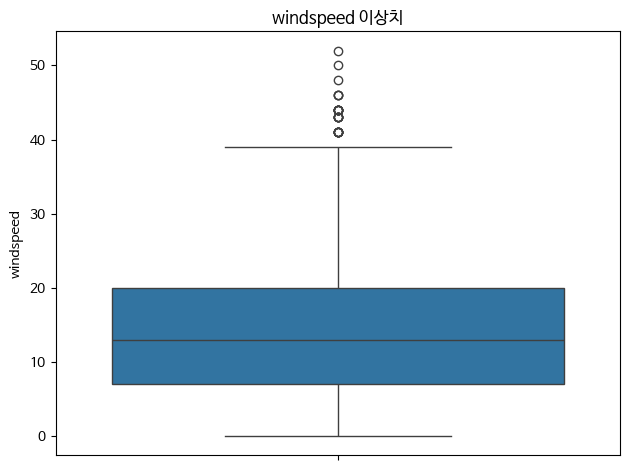

In [ ]:
sns.boxplot(data=train_df['windspeed'])
plt.title('windspeed 이상치')
plt.tight_layout()
plt.show()

In [ ]:
def show_iqr_q1q3(column: str) -> (q1, q3, iqr):
    q1 = np.percentile(train_df[column], 25)
    q3 = np.percentile(train_df[column], 75)
    iqr = q3 - q1

    return (q1, q3, iqr)

q1 = show_iqr_q1q3('windspeed')[0]
q3 = show_iqr_q1q3('windspeed')[1]
iqr = show_iqr_q1q3('windspeed')[2]

windspeed_lower_bound = q1 - 1.5 * iqr
windspeed_upper_bound = q3 + 1.5 * iqr

print('windspeed_lower_bound: ', windspeed_lower_bound)
print('windspeed_upper_bound: ', windspeed_upper_bound)
#print('IQR: ', iqr)

windspeed_lower_bound:  -12.4955
windspeed_upper_bound:  39.4965


**최대 풍속이 40m/s면 사람 및 바위가 날아갈 정도**

In [ ]:
print(len(train_df[(train_df['windspeed'] > windspeed_upper_bound)]))
train_df[(train_df['windspeed'] > windspeed_upper_bound)]

28


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
750,2011-02-14 15:00:00,1,0,1,1,22.96,26.515,21,43.9989,19,71,90
752,2011-02-14 17:00:00,1,0,1,1,18.86,22.725,33,40.9973,25,218,243
753,2011-02-14 18:00:00,1,0,1,1,16.40,20.455,40,40.9973,11,194,205
757,2011-02-14 22:00:00,1,0,1,1,13.94,14.395,46,43.9989,1,44,45
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.120,42,51.9987,0,5,5
761,2011-02-15 02:00:00,1,0,1,1,11.48,11.365,41,46.0022,1,2,3
862,2011-02-19 09:00:00,1,0,0,1,16.40,20.455,16,43.9989,18,37,55
866,2011-02-19 13:00:00,1,0,0,1,18.04,21.970,16,40.9973,52,103,155
867,2011-02-19 14:00:00,1,0,0,1,18.86,22.725,15,43.9989,102,94,196
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.970,16,50.0021,84,87,171


# 데이터 개선

## 데이터 전처리

In [ ]:
train = train_df.drop(columns=['casual', 'registered'])

In [ ]:
def preprocess(df, is_train=True):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['hour'] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek #
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year

    df["is_weekend"] = df["dayofweek"].isin([5, 6]).astype(int)
    df["is_rush_hour"] = df["hour"].isin([7,8,9,17,18,19]).astype(int)

    # 날씨와 습도 기반 피처
    df['is_humidity_weather_conflict'] = ((df['humidity'] == 0) & (df['weather'].isin([3, 4]))).astype(int)
    df['low_humidity'] = (df['humidity'] < 20).astype(int)
    df['high_humidity'] = (df['humidity'] > 90).astype(int)
    df['is_bad_weather'] = df['weather'].isin([3, 4]).astype(int)
    df['bad_weather_and_high_humidity'] = ((df['weather'].isin([3, 4])) & (df['humidity'] > 80)).astype(int)

    # 풍속 이상치 처리
    windspeed_upper_bound = 40
    df['is_windspeed_extreme'] = (df['windspeed'] > windspeed_upper_bound).astype(int)

    if is_train:
        # 훈련 데이터에서만 이상치 제거
        df = df[df['windspeed'] <= windspeed_upper_bound].copy()

    # 필요없는 열 제거
    df = df.drop(columns=['datetime'], errors='ignore')


    return df

train = preprocess(train)
test = preprocess(test_df, False)

test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,dayofweek,month,year,is_weekend,is_rush_hour,is_humidity_weather_conflict,low_humidity,high_humidity,is_bad_weather,bad_weather_and_high_humidity,is_windspeed_extreme
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,1,2011,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,1,2011,0,0,0,0,0,0,0,0
2,1,0,1,1,10.66,13.635,56,0.0000,2,3,1,2011,0,0,0,0,0,0,0,0
3,1,0,1,1,10.66,12.880,56,11.0014,3,3,1,2011,0,0,0,0,0,0,0,0
4,1,0,1,1,10.66,12.880,56,11.0014,4,3,1,2011,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,0,12,2012,0,1,0,0,0,0,0,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,0,12,2012,0,0,0,0,0,0,0,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,0,12,2012,0,0,0,0,0,0,0,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,0,12,2012,0,0,0,0,0,0,0,0


In [ ]:
y = train['count']
X = train.drop(columns=['count'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["count"])  # 입력 변수
y = train["count"]  # 타깃 변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 선형 회귀 (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

y_pred = np.maximum(0, y_pred)
y_test = np.maximum(0, y_test)

lr_rmsle = np.round(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)), 1)

print(f"[Linear Regression] RMSLE: {lr_rmsle}")


[Linear Regression] RMSLE: 1.3


# 릿지 회귀 (Ridge Regression)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

y_pred = np.maximum(0, y_pred)
y_test = np.maximum(0, y_test)

ridge_rmsle = np.round(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)), 1)

print(f"[Ridge] RMSLE: {ridge_rmsle}")


[Ridge] RMSLE: 1.3


# 라쏘 회귀 (Lasso Regression)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

y_pred = np.maximum(0, y_pred)
y_test = np.maximum(0, y_test)

lasso_rmsle = np.round(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)), 1)

print(f"[Lasso] RMSLE: {lasso_rmsle}")


[Lasso] RMSLE: 1.3


# 랜덤 포레스트 회귀 (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

y_pred = np.maximum(0, y_pred)
y_test = np.maximum(0, y_test)

rf_rmsle = np.round(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)), 1)

print(f"[Random Forest] RMSLE: {rf_rmsle}")

[Random Forest] RMSLE: 0.4


부스팅 기반 앙상블 (Gradient Boosting Regressor)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

y_pred = np.maximum(0, y_pred)
y_test = np.maximum(0, y_test)

gbr_rmsle = np.round(np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test)) ** 2)), 1)

print(f"[GBR] RMSLE: {gbr_rmsle}")

[GBR] RMSLE: 0.7


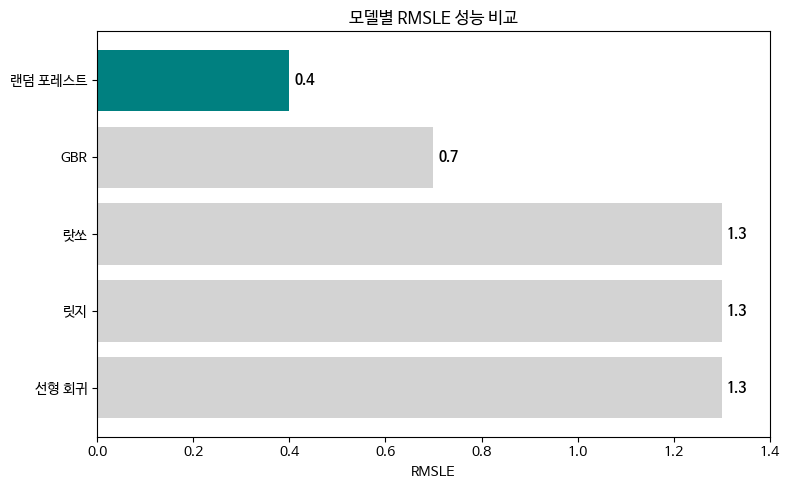

In [ ]:
labels = ['선형 회귀', '릿지', '랏쏘', '랜덤 포레스트', 'GBR']
values = [lr_rmsle, ridge_rmsle, lasso_rmsle, rf_rmsle, gbr_rmsle]

# RMSLE 낮은 순 정렬
sorted_pairs = sorted(zip(values, labels))
sorted_values, sorted_labels = zip(*sorted_pairs)

highlight_index = 0
colors = ['teal' if i == highlight_index else 'lightgray' for i in range(len(sorted_labels))]

plt.figure(figsize=(8, 5))
bars = plt.barh(sorted_labels, sorted_values, color=colors)
plt.xlabel('RMSLE')
plt.title('모델별 RMSLE 성능 비교')

# 수치 라벨 추가
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}", va='center', fontweight='bold')

plt.xlim(0, max(sorted_values) + 0.1)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

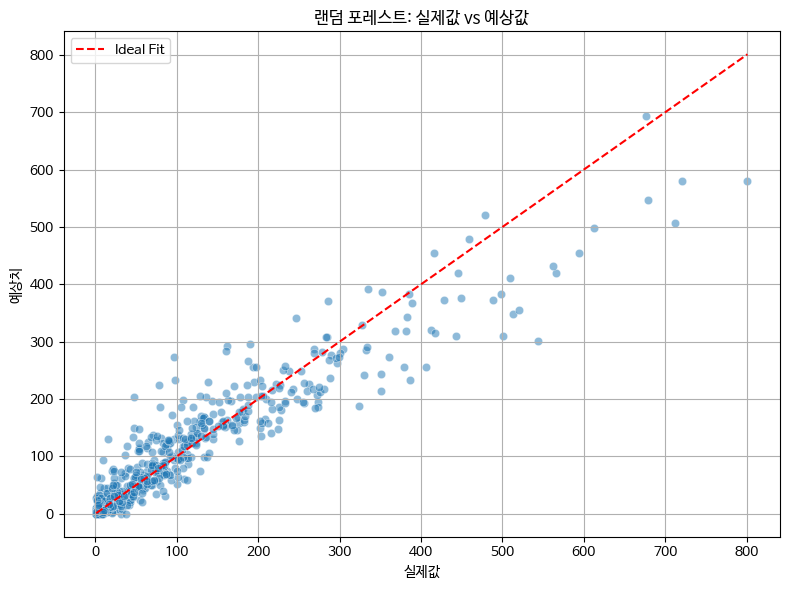

In [ ]:
# 예측값 vs 실제값 산점도
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label='Ideal Fit')
plt.xlabel("실제값")
plt.ylabel("예상치")
plt.title("랜덤 포레스트: 실제값 vs 예상값")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
